## Welcome to Lang Tutorial
- What is [LangChain](https://www.langchain.com/), [LangSmith](https://smith.langchain.com/o/aa8cfe1a-75c1-4fff-bf0c-187edfa443ee/) & [LangGraph](https://www.langchain.com/langgraph)
- How to use these libraries
- What are inside these libraries
- MCP Service
- How to use LangGraph

### Links
- [Jupyter Notebook](https://github.com/vimalmenon/lang-family/blob/main/page.ipynb)

## Topics to Cover
-  LangChain
- LangSmith
- LangGraph
    - Create Workflow
    - RAG
    - DAGS
    - Human In Loops
    - Multi Agent
- MCP Server


## Install Dependencies
poetry install<br>
or <br>
pip install requirements.txt


## Notes
- LangChain
- LangGraph

## Set up Env values
Check .env.sample

In [ ]:
## Load Env Value

from dotenv import load_dotenv

load_dotenv()

True

# Lang Chain
LangChain provides the basic tools to connect to LLM and other basic tools

##  How to Message
- PromptTemplate : 
    - This looks like normal text
    - This is old way
- ChatPromptTemplate : 
    - This looks like chat conversation
    - This is new way

In [ ]:
## Prompt simple way
import pprint

print("------------Normal Way-----------------------")
prompt = "Answer the user query in one line.\n What is Gen AI?"


pprint.pprint(prompt)


## LangChain way

print("------------LangChain way-----------------------")
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    template="Answer the user query in one line.\n{query}\n",
    input_variables=["query"],
)

text_prompt = prompt.invoke({"query": "What is Gen AI?"})

pprint.pprint(text_prompt)

------------Normal Way-----------------------
'Answer the user query in one line.\n What is Gen AI?'
------------LangChain way-----------------------
StringPromptValue(text='Answer the user query in one line.\nWhat is Gen AI?\n')


In [ ]:
## Chat Message simple way
import pprint

print("------------Normal Way-----------------------")
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]

pprint.pprint(messages)


## LangChain way

print("------------LangChain way-----------------------")

from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant that translates English to {language}. Translate the user sentence."),
    MessagesPlaceholder("msgs")
])

prompt_messages = prompt_template.invoke({
    "msgs": [HumanMessage(content="I love programming.")],
    "language": "Hindi"
})

for message in prompt_messages.messages:
    message.pretty_print()

------------Normal Way-----------------------
[('system',
  'You are a helpful assistant that translates English to French. Translate '
  'the user sentence.'),
 ('human', 'I love programming.')]
------------LangChain way-----------------------
================================ System Message ================================

You are a helpful assistant that translates English to Hindi. Translate the user sentence.
================================ Human Message =================================

I love programming.


## Integration with LLM
- Different packages for integrating with different LLM's
- [Chat Model](https://python.langchain.com/docs/integrations/chat/)

In [22]:
## initialize DeepSeek LLM

from langchain_deepseek import ChatDeepSeek

deepseek_llm = ChatDeepSeek(
    model="deepseek-chat",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [ ]:
## initialize OpenAI LLM

from langchain_openai import ChatOpenAI

openai_llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

## How to execute LLM with message

In [24]:
## Calling LLM with text

deepseek_msg = deepseek_llm.invoke(text_prompt)
deepseek_msg.pretty_print()

================================== Ai Message ==================================

Gen AI is artificial intelligence that generates text, images, or other media using learned patterns.


In [25]:
## Invoke LLM with messages

deepseek_msg = deepseek_llm.invoke(prompt_messages)
deepseek_msg.pretty_print()

================================== Ai Message ==================================

मुझे प्रोग्रामिंग पसंद है।


## LangChain Expression Language (LCEL)

In [26]:
## Chaining

deepseek_chained =  prompt_template | deepseek_llm

deepseek_response = deepseek_chained.invoke({
    "msgs": [HumanMessage(content="I love programming.")],
    "language": "French"
})

deepseek_response.pretty_print()


================================== Ai Message ==================================

J'adore programmer.


## LangSmith

Monitoring is very important aspect of all application, So [LangSmith](https://smith.langchain.com/o/aa8cfe1a-75c1-4fff-bf0c-187edfa443ee/) allows to monitor all the LLM usage.


##### [Note] : You need to set up some env variable to connect to LangSmith

### Tools
- Tools allow LLM to connect to systems

In [27]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage, ToolMessage
from langchain.chat_models import init_chat_model
from langchain_core.tools import tool

## Setting up Tools
@tool
def check_email(name:str = None) -> str:
    """Use this tool to get users email address."""
    return "janedoe@example.com"

## Initialize DeepSeek LLM
deepseek_llm_init_chat = init_chat_model(model="deepseek-chat")

## Bind tools to the DeepSeek LLM
deepseek_with_tools = deepseek_llm_init_chat.bind_tools([check_email])

## Create a prompt template for the chat
prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant."),
    MessagesPlaceholder("msgs")
])
prompt_messages = prompt_template.invoke({
    "msgs": [HumanMessage(content="What is Vimal Menon email address.")]
})

## Invoke the DeepSeek LLM with tools
response = deepseek_with_tools.invoke(prompt_messages)
prompt_messages.messages.append(response)
for tool in response.tool_calls:
    if tool["name"] == "check_email":
        tool_msg = check_email.invoke(tool["args"])
        prompt_messages.messages.append(ToolMessage(tool_msg, tool_call_id=tool["id"]))
response = deepseek_with_tools.invoke(prompt_messages)
prompt_messages.messages.append(response)

for message in prompt_messages.messages:
    message.pretty_print()



================================ System Message ================================

You are a helpful assistant.
================================ Human Message =================================

What is Vimal Menon email address.
================================== Ai Message ==================================
Tool Calls:
  check_email (call_0_ca1f944a-c77a-477e-8da6-da9083180bc3)
 Call ID: call_0_ca1f944a-c77a-477e-8da6-da9083180bc3
  Args:
    name: Vimal Menon
================================= Tool Message =================================

janedoe@example.com
================================== Ai Message ==================================

Vimal Menon's email address is janedoe@example.com.


In [28]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage, ToolMessage
from langchain.chat_models import init_chat_model
from langchain_core.tools import tool

## Setting up Tools
@tool
def check_email(name:str = None) -> str:
    """Use this tool to get users email address."""
    return "janedoe@example.com"

## Initialize DeepSeek LLM
deepseek_llm_init_chat = init_chat_model(model="deepseek-chat")

## Bind tools to the DeepSeek LLM
deepseek_with_tools = deepseek_llm_init_chat.bind_tools([check_email])

## Create a prompt template for the chat
prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant."),
    MessagesPlaceholder("msgs")
])

## Chained the prompt and LLM
chained = prompt_template | deepseek_with_tools

## Invoke the DeepSeek LLM with tools
response = chained.invoke({
    "msgs": [HumanMessage(content="What is Vimal Menon email address.")]
})
prompt_messages.messages.append(response)
for tool in response.tool_calls:
    if tool["name"] == "check_email":
        tool_msg = check_email.invoke(tool["args"])
        prompt_messages.messages.append(ToolMessage(tool_msg, tool_call_id=tool["id"]))
response = deepseek_with_tools.invoke(prompt_messages)
prompt_messages.messages.append(response)

for message in prompt_messages.messages:
    message.pretty_print()




================================ System Message ================================

You are a helpful assistant.
================================ Human Message =================================

What is Vimal Menon email address.
================================== Ai Message ==================================
Tool Calls:
  check_email (call_0_ca1f944a-c77a-477e-8da6-da9083180bc3)
 Call ID: call_0_ca1f944a-c77a-477e-8da6-da9083180bc3
  Args:
    name: Vimal Menon
================================= Tool Message =================================

janedoe@example.com
================================== Ai Message ==================================

Vimal Menon's email address is janedoe@example.com.
================================== Ai Message ==================================
Tool Calls:
  check_email (call_0_d4fa7dd5-9f95-4a14-bde7-199aa84d6da2)
 Call ID: call_0_d4fa7dd5-9f95-4a14-bde7-199aa84d6da2
  Args:
    name: Vimal Menon
================================= Tool Message ===============

In [29]:
deepseek_response = deepseek_llm.invoke(prompt_messages)
deepseek_response.pretty_print()

openai_response = deepseek_llm.invoke(text_prompt)
openai_response.pretty_print()

================================== Ai Message ==================================

It looks like there might be some confusion—the email provided (janedoe@example.com) doesn't seem to match the name Vimal Menon, as "Jane Doe" is typically a placeholder name. Unfortunately, I don’t have access to personal email addresses for privacy reasons. 

If you're trying to reach Vimal Menon, I’d recommend checking professional networking platforms like LinkedIn or their organization's website for official contact information. Let me know if you'd like help crafting a professional outreach message!
================================== Ai Message ==================================

Gen AI refers to generative artificial intelligence, which creates new content like text, images, or code based on input data.


## Links

[Output Parser](https://python.langchain.com/docs/concepts/output_parsers/)

In [30]:
## Chaining of PromptTemplate

from langchain.output_parsers.json import SimpleJsonOutputParser
from langchain_core.prompts import PromptTemplate

json_parser = SimpleJsonOutputParser()

prompt = PromptTemplate(
    template="Answer the user query and give the response back in json.\n{query}\n",
    input_variables=["query"],
)

deepseek_chained =  prompt | deepseek_llm | json_parser

deepseek_response = deepseek_chained.invoke({
    "query": "List out 5 countries in Asia and their capitals."
})

deepseek_response

{'countries': [{'name': 'Japan', 'capital': 'Tokyo'},
  {'name': 'China', 'capital': 'Beijing'},
  {'name': 'India', 'capital': 'New Delhi'},
  {'name': 'South Korea', 'capital': 'Seoul'},
  {'name': 'Thailand', 'capital': 'Bangkok'}]}

## LangGraph

Why we need LangGraph. LangGraph makes tool calling simple

In [31]:

from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langchain_deepseek import ChatDeepSeek


deepseek_llm = init_chat_model(model="deepseek-chat")

agent = create_react_agent(deepseek_llm, [check_email])

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant."),
    MessagesPlaceholder("msgs")
])


prompt_messages = prompt_template.invoke({
    "msgs": [HumanMessage(content="What is Vimal Menon's email address.")]
})

for step in agent.stream(prompt_messages, stream_mode="values"):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is Vimal Menon's email address.
================================== Ai Message ==================================
Tool Calls:
  check_email (call_0_db18b2f2-7b09-401f-82b1-7968b8dfd819)
 Call ID: call_0_db18b2f2-7b09-401f-82b1-7968b8dfd819
  Args:
    name: Vimal Menon
================================= Tool Message =================================
Name: check_email

janedoe@example.com
================================== Ai Message ==================================

Vimal Menon's email address is janedoe@example.com.


## Create a workflow
- Created workflow
- DAGS
- RAGS
- HumanInLoop
- Memory


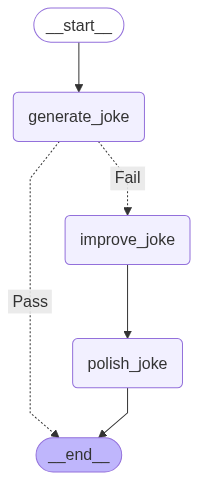

In [32]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing_extensions import TypedDict

# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str

deepseek_llm = ChatDeepSeek(
    model="deepseek-chat",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = deepseek_llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Pass"
    return "Fail"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = deepseek_llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""

    msg = deepseek_llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))